---

## [미니프로젝트] 서울시 공유자전거 '따릉이'의 수요 예측

### 여러분은 서울시 정책 연구원으로써 서울시 공유자전거인 '따릉이'의 수요와 날씨간 연관성을 분석하라는 미션을 부여받았습니다.

#### <font color="blue"> 데이터 분석의 주 목적은 가치있는 정보를 찾아내는것!! </font>

### ▣ 우리가 풀어야 하는 문제는 무엇인가요?

 - 기상상황이 따릉이 수요에 주는 영향을 분석해봅시다.

---

## ▣ 데이터 소개
[기본 데이터]
* 학습데이터 : traindata.csv

## ▣ 데이터셋의 변수 소개
* date : 날짜
* hour : 시간
* temperature : 온도
* precipitation : 강우 여부, 비가 오지 않았으면 0, 비가 오면 1
* windspeed : 풍속(평균)
* humidity : 습도
* visibility : 시정(視程), 시계(視界)(특정 기상 상태에 따른 가시성을 의미)
* ozone : 오존 수치
* PM10 : 미세먼지 수치(머리카락 굵기의 1/5에서 1/7 크기의 미세먼지)
* PM2.5 : 초미세먼지 수치(머리카락 굵기의 1/20에서 1/30 크기의 미세먼지)
* count : 시간에 따른 따릉이 대여 수

---

### [과제1] 환경 설정
#### <span style="color: green"> 1) 라이브러리 불러오기 </span>

In [357]:
#EDA에 사용할 라이브러리를 import 하세요
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False},) # 마이너스 부호 깨짐 현상 해결)   

#### <span style="color: green"> 2) 활용할 데이터 불러오기 </span>

In [5]:
#이번 프로젝트에서 분석할 데이터를 불러오세요
data = pd.read_csv('traindata.csv')
data.tail()

,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count
5822,2021-11-29,20,74.0,58.0,0.002,9.3,0,0.3,66,1193,273
5823,2021-11-29,21,65.0,56.0,0.002,8.4,0,2.0,70,1233,228
5824,2021-11-29,22,51.0,41.0,0.002,8.6,0,1.9,70,1250,215
5825,2021-11-29,23,43.0,35.0,0.001,8.2,0,2.1,71,1262,125
5826,2021-11-30,0,39.0,31.0,0.004,7.9,0,2.3,71,1483,95


### [과제2] 가설설정
#### '가설' 이란 단어를 생각해보면, 우리가 직접 가설을 만들어야 할것 같지만 통계에서 분석기법별 귀무가설/대립가설은 정해져있습니다.
- 귀무가설은 차이가 없다, 연관성이 없다, 효과가 없다.
- 대립가설은 차이가 있다, 연관성이 있다, 효과가 있다. 라고 간단하게 이해하시면 좋습니다.

#### 간단한 예로, 온도와 따릉이 대여량간 가설을 수립 해본다면

    - 귀무가설 : 온도와 따릉이 간에는 연관성이 없다.
    - 대립가설 : 온도와 따릉이 간에는 연관성이 있다.

로 가설이 자연스레 수립 됩니다.



---


#### <span style="color: green"> 'precipitation' 변수를 포함하여, 최소 5개 이상의 Feature와 따릉이 대여량 간 가설을 수립해주세요. </span>

##### Guide : Target은 따릉이 대여량 입니다.

- 가설 1 : 1시간전 강우 여부와 따릉이 대여량 간에는 연관성이 있다.

- 가설 2 : 출퇴근시간과 따릉이 대여량 간에는 연관성이 있다.

- 가설 3 : 평균 기온대비 해당일의 기온과 따릉이 대여량은 연관성이 있다.

- 가설 4 : 습도(적정습도)/가시성은 따릉이 대여량과 연관이 있다.

- 가설 5 : 미세먼지 수치와 따릉이 대여량 간에는 연관성이 있다.

- 가설 6 : 주말보다 평일에 따릉이 대여량이 더 높을 것이다.

### [과제3] 단변량 분석

단변량 분석은 데이터분석의 매우 기초적인 분석기법으로, 독립적인 개별 변수가 가지고있는 특성들을 이해하는 과정입니다.

<span style="color: green"> 개별 변수에 대해 아래 사항들을 분석해보세요. </span>

1. 변수가 내포하고 있는 의미
2. 변수가 수치형인지, 범주형인지
3. 결측치 존재 여부 및 조치 방안
4. 기초 통계량 확인
5. 데이터 분포 확인
6. 위 정보로부터 파악한 내용 정리
7. 추가 분석사항 도출

### Feature1 : hour

In [431]:
var = 'hour'

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

월별 시간대

2. 변수가 수치형인지 범주형인지


In [219]:
#변수의 자료형을 확인해보세요.

In [221]:
data[var].dtype

dtype('int64')

숫자형

In [435]:
data[var].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23,  0], dtype=int64)

3. 변수의 결측치unique 여부 및 조치방안

In [222]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 

In [223]:
data[var].isna().sum()

0

4. 변수의 기초 통계량 확인

In [224]:
#변수의 기초 통계량을 확인해보세요

In [225]:
data[var].describe()

count    5827.000000
mean       11.506607
std         6.921963
min         0.000000
25%         6.000000
50%        12.000000
75%        18.000000
max        23.000000
Name: hour, dtype: float64

In [ ]:
# 0-23시로 분포되어있다.

5. 변수의 분포 확인

In [226]:
#변수의 분포를 시각화 라이브러리를 활용해 확인해보세요.

<AxesSubplot:xlabel='hour', ylabel='Density'>

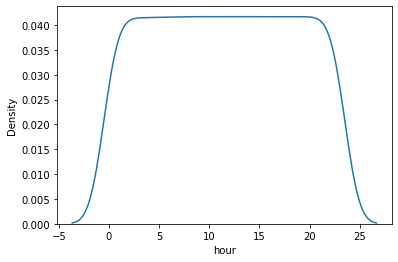

In [229]:
sns.kdeplot(x=var, data=data)

6. 위 정보로 부터 파악한 내용 정리

In [266]:
#위 정보로부터 파악하신 내용을 정리해보세요.

참고) 적정 습도는 온도에 따라 달라지는데 15℃에서는 70%, 18~20℃에서는 60%, 21~23℃에서는 50%, 24℃ 이상일 때는 40% 정도

7. 추가 분석사항 도출

In [81]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

가시성이 평균보다 낮은 경우 평균 133건, 높은 경우 평균 238건으로 가시성이 평균 이상인 경우 대여량이 약 100건 더 높다.

### Feature2 : temperature

In [230]:
var = 'temperature'

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

온도

2. 변수가 수치형인지 범주형인지


In [219]:
#변수의 자료형을 확인해보세요.

In [231]:
data[var].dtype

dtype('float64')

숫자형

3. 변수의 결측치 존재 여부 및 조치방안

In [222]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 

In [232]:
data[var].isna().sum()

0

4. 변수의 기초 통계량 확인

In [224]:
#변수의 기초 통계량을 확인해보세요

In [233]:
data[var].describe()

count    5827.000000
mean       19.376798
std         7.501572
min        -3.500000
25%        14.100000
50%        20.400000
75%        24.900000
max        36.300000
Name: temperature, dtype: float64

In [ ]:
# 4월부터 11월까지 봄~겨울까지 분포

5. 변수의 분포 확인

In [226]:
#변수의 분포를 시각화 라이브러리를 활용해 확인해보세요.

<AxesSubplot:xlabel='temperature', ylabel='Density'>

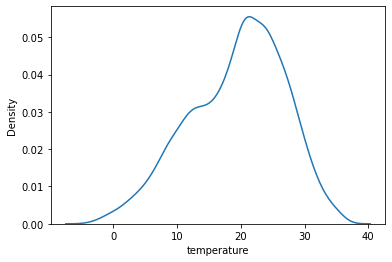

In [234]:
sns.kdeplot(x=var, data=data)

6. 위 정보로 부터 파악한 내용 정리

In [266]:
#위 정보로부터 파악하신 내용을 정리해보세요.

In [ ]:
# 4월부터 11월까지 봄~겨울까지 분포

참고) 적정 습도는 온도에 따라 달라지는데 15℃에서는 70%, 18~20℃에서는 60%, 21~23℃에서는 50%, 24℃ 이상일 때는 40% 정도

7. 추가 분석사항 도출

In [81]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

가시성이 평균보다 낮은 경우 평균 133건, 높은 경우 평균 238건으로 가시성이 평균 이상인 경우 대여량이 약 100건 더 높다.

### Feature3 : precipitation

In [235]:
var = 'precipitation'

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

강수 여부(0, 1)

2. 변수가 수치형인지 범주형인지


In [219]:
#변수의 자료형을 확인해보세요.

In [236]:
data[var].dtype

dtype('int64')

범주형

3. 변수의 결측치 존재 여부 및 조치방안

In [222]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 

In [237]:
data[var].isna().sum()

0

4. 변수의 기초 통계량 확인

In [224]:
#변수의 기초 통계량을 확인해보세요

In [238]:
data[var].describe()

count    5827.000000
mean        0.075511
std         0.264236
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: precipitation, dtype: float64

In [ ]:
# 강수가 있으면 0 없으면 1

5. 변수의 분포 확인

In [226]:
#변수의 분포를 시각화 라이브러리를 활용해 확인해보세요.

<AxesSubplot:xlabel='precipitation', ylabel='count'>

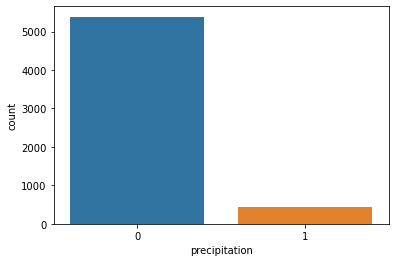

In [241]:
sns.countplot(x=var, data=data)

In [244]:
cnt = data[var].value_counts()
print(cnt.index)
print(cnt.values)

Int64Index([0, 1], dtype='int64')
[5387  440]


6. 위 정보로 부터 파악한 내용 정리

In [266]:
#위 정보로부터 파악하신 내용을 정리해보세요.

7. 추가 분석사항 도출

In [81]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

PM2.5

In [285]:
var = 'PM2.5'

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

초미세먼지 농도

2. 변수가 수치형인지 범주형인지


In [219]:
#변수의 자료형을 확인해보세요.

In [246]:
data[var].dtype

dtype('float64')

숫자형

3. 변수의 결측치 존재 여부 및 조치방안

In [222]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 

In [247]:
data[var].isna().sum()

95

In [300]:
# 뒤값의 데이터로 채우기
data_na = data.fillna(method='bfill')
print(data[var].mean(), data_na[var].mean()) # 차이가 거의 안남

31.970655021834062 31.853784108460616


In [301]:
data = data.fillna(method='bfill')

4. 변수의 기초 통계량 확인

In [224]:
#변수의 기초 통계량을 확인해보세요

In [248]:
data[var].describe()

count    5732.000000
mean       15.666609
std        13.850990
min         1.000000
25%         7.000000
50%        13.000000
75%        20.000000
max       125.000000
Name: PM2.5, dtype: float64

In [ ]:
# 평균 15, 최소 1, 최대 125

5. 변수의 분포 확인

In [226]:
#변수의 분포를 시각화 라이브러리를 활용해 확인해보세요.

<AxesSubplot:xlabel='PM2.5', ylabel='Density'>

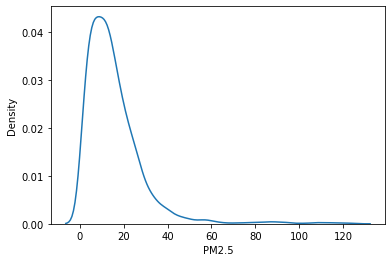

In [250]:
sns.kdeplot(x=var, data=data)

6. 위 정보로 부터 파악한 내용 정리

In [266]:
#위 정보로부터 파악하신 내용을 정리해보세요.

7. 추가 분석사항 도출

In [81]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature5 : PM10

In [303]:
var = 'PM10'

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

미세먼지 농도

2. 변수가 수치형인지 범주형인지


In [219]:
#변수의 자료형을 확인해보세요.

In [252]:
data[var].dtype

dtype('float64')

숫자형

3. 변수의 결측치 존재 여부 및 조치방안

In [222]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 

In [302]:
data[var].isna().sum()

0

In [297]:
print(data[var].mean(), data_na[var].mean())

31.970655021834062 31.853784108460616


4. 변수의 기초 통계량 확인

In [224]:
#변수의 기초 통계량을 확인해보세요

In [254]:
data[var].describe()

count    5725.000000
mean       31.970655
std        42.987292
min         3.000000
25%        16.000000
50%        25.000000
75%        37.000000
max       827.000000
Name: PM10, dtype: float64

In [ ]:
# 평균 31, 최소 3, 최대 827

5. 변수의 분포 확인

In [226]:
#변수의 분포를 시각화 라이브러리를 활용해 확인해보세요.

<AxesSubplot:xlabel='PM10', ylabel='Density'>

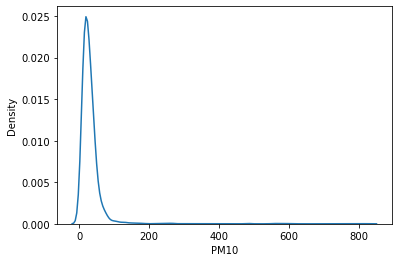

In [255]:
sns.kdeplot(x=var, data=data)

6. 위 정보로 부터 파악한 내용 정리

In [266]:
#위 정보로부터 파악하신 내용을 정리해보세요.

In [ ]:
# 평균 31, 최소 3, 최대 827

7. 추가 분석사항 도출

In [81]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature6 : windspeed

In [256]:
var = 'windspeed'

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

풍속

2. 변수가 수치형인지 범주형인지


In [219]:
#변수의 자료형을 확인해보세요.

In [257]:
data[var].dtype

dtype('float64')

숫자형

3. 변수의 결측치 존재 여부 및 조치방안

In [222]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 

In [258]:
data[var].isna().sum()

0

4. 변수의 기초 통계량 확인

In [224]:
#변수의 기초 통계량을 확인해보세요

In [259]:
data[var].describe()

count    5827.000000
mean        2.237601
std         1.054516
min         0.000000
25%         1.500000
50%         2.200000
75%         2.800000
max         8.300000
Name: windspeed, dtype: float64

In [ ]:
# 평균 2, 최소 0, 최대 8.3

5. 변수의 분포 확인

In [226]:
#변수의 분포를 시각화 라이브러리를 활용해 확인해보세요.

<AxesSubplot:xlabel='windspeed', ylabel='Density'>

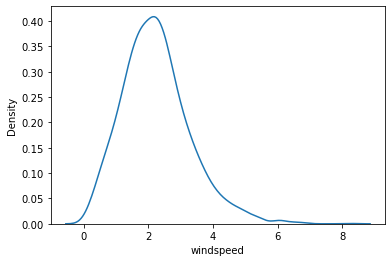

In [260]:
sns.kdeplot(x=var, data=data)

6. 위 정보로 부터 파악한 내용 정리

In [266]:
#위 정보로부터 파악하신 내용을 정리해보세요.

7. 추가 분석사항 도출

In [81]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature7 : humidity

In [261]:
var = 'humidity'

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

습도

2. 변수가 수치형인지 범주형인지


In [219]:
#변수의 자료형을 확인해보세요.

In [262]:
data[var].dtype

dtype('int64')

숫자형

3. 변수의 결측치 존재 여부 및 조치방안

In [222]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 

In [263]:
data[var].isna().sum()

0

4. 변수의 기초 통계량 확인

In [224]:
#변수의 기초 통계량을 확인해보세요

In [264]:
data[var].describe()

count    5827.000000
mean       68.608718
std        17.277266
min        19.000000
25%        56.000000
50%        70.000000
75%        82.000000
max       100.000000
Name: humidity, dtype: float64

In [ ]:
# 평균 68.6, 최소 19, 최대 100

5. 변수의 분포 확인

In [226]:
#변수의 분포를 시각화 라이브러리를 활용해 확인해보세요.

<AxesSubplot:xlabel='humidity', ylabel='Density'>

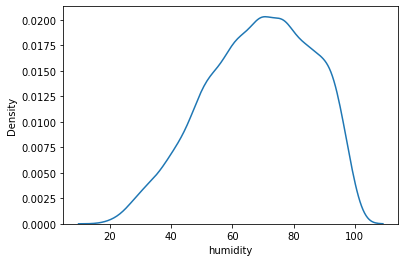

In [265]:
sns.kdeplot(x=var, data=data)

6. 위 정보로 부터 파악한 내용 정리

In [266]:
#위 정보로부터 파악하신 내용을 정리해보세요.

In [ ]:
# 참고) 적정 습도는 온도에 따라 달라지는데 15℃에서는 70%, 1820℃에서는 60%, 2123℃에서는 50%, 24℃ 이상일 때는 40% 정도

7. 추가 분석사항 도출

In [81]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

In [267]:
# 적정습도일 경우와 아닌경우 비교
print(data.loc[(data[var] >= 40) & (data[var] <= 60), 'count'].mean(), data.loc[(data[var] < 40) | (data[var] > 60), 'count'].mean())

309.89641693811075 181.22110904007457


적정습도일 경우 평균 310건, 아닌경우 181건으로 130건 가량 차이가 남

### Feature8 : visibility

In [268]:
var = 'visibility'

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

가시성

2. 변수가 수치형인지 범주형인지


In [219]:
#변수의 자료형을 확인해보세요.

In [269]:
data[var].dtype

dtype('int64')

숫자형

3. 변수의 결측치 존재 여부 및 조치방안

In [270]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 

In [271]:
data[var].isna().sum()

0

4. 변수의 기초 통계량 확인

In [272]:
#변수의 기초 통계량을 확인해보세요

In [273]:
data[var].describe()

count    5827.000000
mean     1758.438648
std       490.969394
min        60.000000
25%      1935.500000
50%      2000.000000
75%      2000.000000
max      2000.000000
Name: visibility, dtype: float64

In [ ]:
# 평균 1758, 최소 60, 최대 2000

5. 변수의 분포 확인

In [226]:
#변수의 분포를 시각화 라이브러리를 활용해 확인해보세요.

<AxesSubplot:xlabel='visibility', ylabel='Density'>

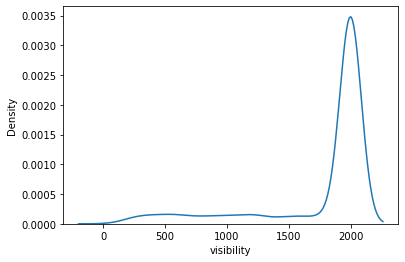

In [274]:
sns.kdeplot(x=var, data=data)

6. 위 정보로 부터 파악한 내용 정리

In [266]:
#위 정보로부터 파악하신 내용을 정리해보세요.

7. 추가 분석사항 도출

In [81]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature9 : ozone

In [348]:
var = 'ozone'

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

오존 농도

2. 변수가 수치형인지 범주형인지


In [349]:
#변수의 자료형을 확인해보세요.

In [350]:
data[var].dtype

dtype('float64')

숫자형

3. 변수의 결측치 존재 여부 및 조치방안

In [351]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 

In [352]:
data[var].isna().sum()

0

4. 변수의 기초 통계량 확인

In [353]:
#변수의 기초 통계량을 확인해보세요

In [354]:
data[var].describe()

count    5827.000000
mean        0.031678
std         0.018277
min         0.001000
25%         0.019000
50%         0.030000
75%         0.041000
max         0.137000
Name: ozone, dtype: float64

In [ ]:
# 평균 0.03, 최소 0.001, 최대 0.137

5. 변수의 분포 확인

In [226]:
#변수의 분포를 시각화 라이브러리를 활용해 확인해보세요.

<AxesSubplot:xlabel='ozone', ylabel='Density'>

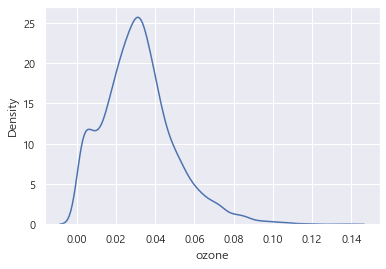

In [358]:
sns.kdeplot(x=var, data=data)

6. 위 정보로 부터 파악한 내용 정리

In [266]:
#위 정보로부터 파악하신 내용을 정리해보세요.

7. 추가 분석사항 도출

In [359]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Count (Target)

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

In [43]:
var = 'count'

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

단위 시간별 따릉이 대여량

2. 변수가 수치형인지 범주형인지


In [44]:
#변수의 자료형을 확인해보세요.
data[var].dtype

dtype('int64')

숫자형

3. 변수의 결측치 존재 여부 및 조치방안

In [45]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 
data[var].isna().sum()

0

없음

4. 변수의 기초 통계량 확인

In [46]:
#변수의 기초 통계량을 확인해보세요
data[var].describe()

count    5827.000000
mean      215.117899
std       185.972900
min         1.000000
25%        53.000000
50%       186.000000
75%       315.000000
max      1746.000000
Name: count, dtype: float64

평균 215건, 최소 1건 최대 1746건

5. 변수의 분포 확인

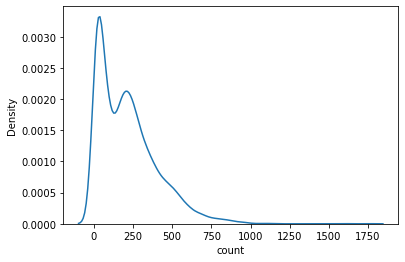

In [52]:
#변수의 분포를 시각화 라이브러리를 활용해 확인해보세요.
sns.kdeplot(var, data=data)
plt.show()

강수량이 없는 경우가 훨씬 많다.

6. 위 정보로 부터 파악한 내용 정리

In [ ]:
#위 정보로부터 파악하신 내용을 정리해보세요.

평균 215건, 최소 1건 최대 1746건
100건 정도가 가장 많은 것 같다.

7. 추가 분석사항 도출

In [58]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

# 가장 적은 시간대와 가장 많은 시간대는?
data.sort_values(by=var)
# 평균보다 많은 경우만 보면?
data.loc[data[var] > data[var].mean(), 'hour'].unique()

array([ 8,  9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 10,  7, 23,
        0], dtype=int64)

### 4.이변량 분석 
* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.
* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 적절한 유의수준
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.

#### (1) 범주형 Feature --> 숫자형 Y (따릉이 대여 Count)

<font color="green">* 모든 범주형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.</font>


        1. 시각화 : 그래프를 활용한 데이터 분석
        2. 수치화 : t-test, anova
        3. 관계 평가 (가설 검정)

In [89]:
import scipy.stats as spst

#### 1. 강수 여부와 따릉이 대여량간 이변량 분석(1시간전 강우 여부와 따릉이 대여량 간에는 연관성이 있다.)

In [92]:
feature = 'precipitation'
target = 'count'

<AxesSubplot:xlabel='precipitation', ylabel='count'>

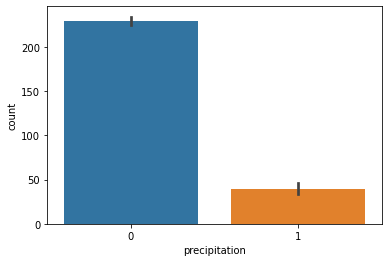

In [93]:
#데이터 타입에 주의하여 이변량 분석을 해보세요
sns.barplot(x=feature, y=target, data=data)

In [96]:
# 변수가 2개이므로 t-test 진행
p_0 = data.loc[data[feature] == 0, target]
p_1 = data.loc[data[feature] == 1, target]
t_test = spst.ttest_ind(p_0, p_1)
t_test

Ttest_indResult(statistic=21.389614151911022, pvalue=8.86239184041254e-98)

pvalue가 0에 가까움으로 한 시간전 강수가 없는 경우 따릉이 대여량이 더 높음을 알 수 있음

#### (2) 숫자형 Feature --> 숫자형 Y (따릉이 대여 Count)

<font color="green">* 모든 숫자형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.  </font>


        1. 시각화 : 그래프를 활용한 데이터 분석
        2. 수치화 : 상관분석
        3. 관계 평가 (가설 검정)

#### 2. 시간대별 데이터와 따릉이 대여량간 분석(출퇴근시간과 따릉이 대여량 간에는 연관성이 있다)

In [403]:
feature = 'hour'

<AxesSubplot:xlabel='hour', ylabel='count'>

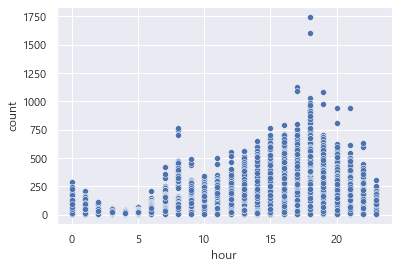

In [367]:
#데이터 타입에 주의하여 이변량 분석을 해보세요
plt.title('시간대별 ')
sns.scatterplot(x=feature, y=target, data=data)

오전에는 8시, 오후에는 18시에 따릉이 대여량이 가장 높다는 것을 알 수 있음   
=> 이는 출퇴근시간이므로 출퇴근시간과 따릉이 대여량은 관계가 있다는 것을 짐작해 볼 수 있음 

In [413]:
weekday = data.loc[(data['day'] != 'Saturday') & (data['day'] != 'Saturday')]
weekday

,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count,month,day
0,2021-04-01,1,42.0,21.0,0.002,13.1,0,1.4,49,2000,46,2021-04,Thursday
1,2021-04-01,2,41.0,21.0,0.003,12.4,0,2.1,53,2000,40,2021-04,Thursday
2,2021-04-01,3,30.0,13.0,0.023,13.1,0,3.4,43,2000,31,2021-04,Thursday
3,2021-04-01,4,27.0,12.0,0.028,13.0,0,3.1,44,2000,12,2021-04,Thursday
4,2021-04-01,5,29.0,14.0,0.008,13.0,0,2.9,44,2000,30,2021-04,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5822,2021-11-29,20,74.0,58.0,0.002,9.3,0,0.3,66,1193,273,2021-11,Monday
5823,2021-11-29,21,65.0,56.0,0.002,8.4,0,2.0,70,1233,228,2021-11,Monday
5824,2021-11-29,22,51.0,41.0,0.002,8.6,0,1.9,70,1250,215,2021-11,Monday
5825,2021-11-29,23,43.0,35.0,0.001,8.2,0,2.1,71,1262,125,2021-11,Monday


<AxesSubplot:title={'center':'평일 시간대별 평균 따릉이 대여량'}, xlabel='hour', ylabel='count'>

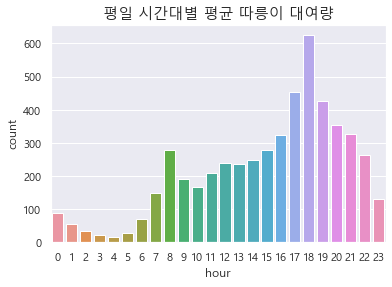

In [417]:
temp_f = weekday.groupby(by=feature, as_index=False).mean()[feature]
temp_t = weekday.groupby(by=feature, as_index=False).mean()[target]

plt.title('평일 시간대별 평균 따릉이 대여량', fontdict={'fontsize' : 15})
sns.barplot(x=temp_f, y=temp_t)

In [111]:
temp_f = data.groupby(by=feature, as_index=False).mean()[feature]
temp_t = data.groupby(by=feature, as_index=False).mean()[target]

0      0
1      1
2      2
3      3
4      4
5      5
6      6
7      7
8      8
9      9
10    10
11    11
12    12
13    13
14    14
15    15
16    16
17    17
18    18
19    19
20    20
21    21
22    22
23    23
Name: hour, dtype: int64

In [112]:
# 상관분석
spst.pearsonr(temp_f, temp_t)

(0.7485642292809059, 2.5852069572452802e-05)

In [ ]:
시간대와 따릉이 대여량은 0.75로 높은 양의 상관관계를 가지며, p-value 또한 0에 가까우므로 유의함

#### 3. 온도 데이터와 따릉이 대여량간 분석(평균 기온대비 해당일의 기온과 따릉이 대여량은 연관성이 있다.)

In [113]:
feature = 'temperature'

In [114]:
#데이터 타입에 주의하여 이변량 분석을 해보세요

In [165]:
# 월별 시간대별 평균기온 구하기
data['date'] = pd.to_datetime(data['date'])
data['month'] = data['date'].dt.to_period('M')
month = data.groupby(['month', 'hour'])[feature].mean().reset_index()
month = month.rename(columns={ feature : 'meanf'})
month

,month,hour,meanf
0,2021-04,0,12.168966
1,2021-04,1,11.776667
2,2021-04,2,11.420690
3,2021-04,3,11.046667
4,2021-04,4,10.758621
...,...,...,...
187,2021-11,19,9.320690
188,2021-11,20,8.762069
189,2021-11,21,8.262069
190,2021-11,22,7.868966


In [168]:
# 평균 기온과의 기온차 변수 생성
month_temp = pd.merge(data,month,how='inner', on=['month', 'hour'])

month_temp['diff_temp'] = month_temp[feature] - month_temp['meanf']
month_temp.head()

,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count,month,meanf,diff_temp
0,2021-04-01,1,42.0,21.0,0.002,13.1,0,1.4,49,2000,46,2021-04,11.776667,1.323333
1,2021-04-02,1,45.0,11.0,0.040,14.2,0,4.8,39,2000,48,2021-04,11.776667,2.423333
2,2021-04-03,1,49.0,19.0,0.022,17.7,0,1.8,45,2000,62,2021-04,11.776667,5.923333
3,2021-04-04,1,3.0,1.0,0.038,10.5,1,3.9,96,877,11,2021-04,11.776667,-1.276667
4,2021-04-05,1,21.0,10.0,0.020,8.1,0,1.8,67,2000,35,2021-04,11.776667,-3.676667


In [174]:
up = month_temp.loc[month_temp['diff_temp'] > 0, 'diff_temp'].mean()
down = month_temp.loc[month_temp['diff_temp'] < 0, 'diff_temp'].mean()
up, down

(2.583229168938618, -2.856769518233536)

In [205]:
# 여름일 때 평균 기온차보다 높은 날 따릉이 대여량
summer = month_temp.loc[(month_temp['month'] == '2021-06') | (month_temp['month'] == '2021-07') | (month_temp['month'] == '2021-08')]
up = summer.loc[summer['diff_temp'] > 0, 'diff_temp'].mean()
down = summer.loc[summer['diff_temp'] < 0, 'diff_temp'].mean()
print('평균 기온차보다 높은 날 따릉이 대여량의 평균 :', summer.loc[(summer['diff_temp'] > up), target].mean())
print('평균 기온차보다 낮은 날 따릉이 대여량의 평균 :', summer.loc[(summer['diff_temp'] < down), target].mean())

평균 기온차보다 높은 날 따릉이 대여량의 평균 : 242.0531914893617
평균 기온차보다 낮은 날 따릉이 대여량의 평균 : 184.83028720626632


In [201]:
print('평균 기온차보다 높은 날 강수 여부')
print(summer.loc[(summer['diff_temp'] > up), 'precipitation'].value_counts())
print('----------------------------------')
print('평균 기온차보다 낮은 날 강수 여부')
print(summer.loc[(summer['diff_temp'] < down), 'precipitation'].value_counts())

평균 기온차보다 높은 날 강수 여부
0    559
1      5
Name: precipitation, dtype: int64
----------------------------------
평균 기온차보다 낮은 날 강수 여부
0    282
1    101
Name: precipitation, dtype: int64


<b>여름의 경우 평균 기온차보다 낮은 날에는 비가 왔을 가능성이 높기때문에 따릉이 대여량이 기온차가 높은 날 보다 평균적으로 낮다.</b>

In [370]:
spst.pearsonr(summer['diff_temp'], summer['count'])

(0.1606465815355495, 3.107174450952495e-14)

In [206]:
# 겨울일 때 평균 기온차보다 높은 날 따릉이 대여량
winter = month_temp.loc[(month_temp['month'] == '2021-11')]
up = winter.loc[winter['diff_temp'] > 0, 'diff_temp'].mean()
down = winter.loc[winter['diff_temp'] < 0, 'diff_temp'].mean()
print('평균 기온차보다 높은 날 따릉이 대여량의 평균 :', winter.loc[(winter['diff_temp'] > up), target].mean())
print('평균 기온차보다 낮은 날 따릉이 대여량의 평균 :', winter.loc[(winter['diff_temp'] < down), target].mean())

평균 기온차보다 높은 날 따릉이 대여량의 평균 : 248.39506172839506
평균 기온차보다 낮은 날 따릉이 대여량의 평균 : 128.53642384105962


In [207]:
print('평균 기온차보다 높은 날 강수 여부')
print(winter.loc[(winter['diff_temp'] > up), 'precipitation'].value_counts())
print('----------------------------------')
print('평균 기온차보다 낮은 날 강수 여부')
print(winter.loc[(winter['diff_temp'] < down), 'precipitation'].value_counts())

평균 기온차보다 높은 날 강수 여부
0    160
1      2
Name: precipitation, dtype: int64
----------------------------------
평균 기온차보다 낮은 날 강수 여부
0    146
1      5
Name: precipitation, dtype: int64


<b>겨울의 경우 평균 기온차보다 높은 날에는 따릉이 대여량이 기온차가 낮은 날 보다 평균적으로 높다.</b>

In [369]:
spst.pearsonr(winter['diff_temp'], winter['count'])

(0.2801352838248771, 4.9259350378300576e-14)

#### 4. 습도 데이터와 따릉이 대여량간 분석(습도와 따릉이 대여량은 연관이 있다.)

In [13]:
#데이터 타입에 주의하여 이변량 분석을 해보세요

In [424]:
feature = 'humidity'

<AxesSubplot:xlabel='humidity', ylabel='count'>

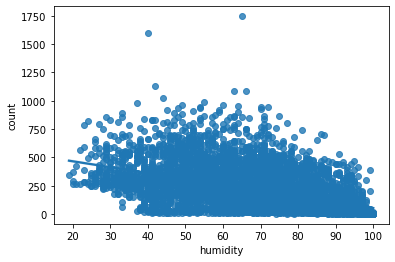

In [217]:
sns.regplot(x=feature, y=target, data=data)

In [211]:
print('적정습도인 경우 :' ,data.loc[(data[feature] >= 40) & (data[feature] <= 60), target].mean())
print('적정습도가 아닌 경우 :', data.loc[(data[feature] < 40) | (data[feature] > 60), target].mean())

적정습도인 경우 : 309.89641693811075
적정습도가 아닌 경우 : 181.22110904007457


In [216]:
spst.pearsonr(data[feature], data[target])

(-0.4789554265904137, 0.0)

강한 음의 상관관계를 가지며 p-value도 유의하다

#### 5. 시정 데이터와 따릉이 대여량간 분석(가시성과 따릉이 대여량은 연관이 있다.)

In [14]:
#데이터 타입에 주의하여 이변량 분석을 해보세요

In [371]:
feature = 'visibility'

In [278]:
# 적정습도일 경우와 아닌경우 비교
print('가시성이 평균보다 낮은 경우 :' , data.loc[(data[feature] < data[feature].mean()), target].mean())
print('가시성이 평균보다 높은 경우 :' , data.loc[(data[feature] > data[feature].mean()), target].mean())

가시성이 평균보다 낮은 경우 : 133.40729247478666
가시성이 평균보다 높은 경우 : 238.32745702952843


In [374]:
# 강수가 있는 경우 평균 가시성이 더 낮다.
print(data.loc[(data[feature] < data[feature].mean()), 'precipitation'].value_counts())
print( data.loc[(data[feature] > data[feature].mean()), 'precipitation'].value_counts())

0    940
1    349
Name: precipitation, dtype: int64
0    4447
1      91
Name: precipitation, dtype: int64


가시성이 평균보다 낮은 경우 평균 133건, 높은 경우 평균 238건으로 가시성이 평균 이상인 경우 대여량이 약 100건 더 높다.

In [279]:
spst.pearsonr(data[feature], data[target])

(0.26582778327488765, 7.876003852900128e-95)

#### 6. 미세먼지 농도 데이터와 따릉이 대여량간 분석

In [16]:
#데이터 타입에 주의하여 이변량 분석을 해보세요

In [304]:
feature = 'PM10'

<AxesSubplot:xlabel='PM2.5', ylabel='count'>

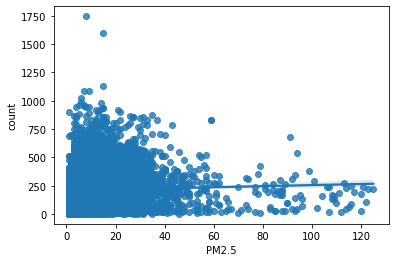

In [308]:
sns.regplot(x=feature, y=target, data=data)

In [305]:
spst.pearsonr(data[feature], data[target])

(0.027690201326183578, 0.034542825293046905)

In [ ]:
유의미하다고 볼 수 없다.

- 미세먼지가 나쁨이상(나쁨(81~150㎍/㎥) 혹은 매우 나쁨(151㎍/㎥ 이상))일 경우 따릉이 대여량이 더 낮을까?

In [314]:
good = data.loc[data[feature] < 81, target].mean()
bad = data.loc[data[feature] >= 81, target].mean()

print('미세먼지가 좋은 경우 :' , good)
print('미세먼지가 안좋은 경우 :' , bad)

미세먼지가 좋은 경우 : 215.55418761921277
미세먼지가 안좋은 경우 : 173.18333333333334


#### 7. 초미세먼지 농도 데이터와 따릉이 대여량간 분석

In [17]:
#데이터 타입에 주의하여 이변량 분석을 해보세요

In [315]:
feature = 'PM2.5'

<AxesSubplot:xlabel='PM2.5', ylabel='count'>

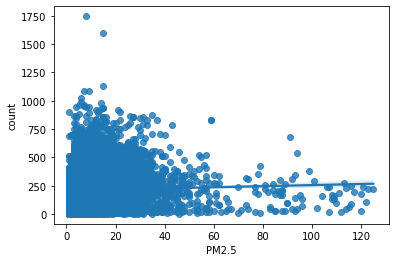

In [309]:
sns.regplot(x=feature, y=target, data=data)

In [307]:
spst.pearsonr(data[feature], data[target])

(0.03544922928145933, 0.006804176771228327)

유의미하다고 볼 수 없다

- 초미세먼지가 나쁨이상(나쁨(36㎍/㎥ 이상))일 경우 따릉이 대여량이 더 낮을까?

In [318]:
good = data.loc[data[feature] < 36, target].mean()
bad = data.loc[data[feature] >= 36, target].mean()

print('초미세먼지가 좋은 경우 :' , good)
print('초미세먼지가 안좋은 경우 :' , bad)

초미세먼지가 좋은 경우 : 215.68407643312102
초미세먼지가 안좋은 경우 : 205.74698795180723


#### 8. 요일과 따릉이 대여량간 분석

In [361]:
feature = 'day'

In [320]:
# 요일별 시간대별 따릉이 대여량 분석
data['date'] = pd.to_datetime(data['date'])
data['day'] = data['date'].dt.day_name()
data.head()

,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count,month,day
0,2021-04-01,1,42.0,21.0,0.002,13.1,0,1.4,49,2000,46,2021-04,Thursday
1,2021-04-01,2,41.0,21.0,0.003,12.4,0,2.1,53,2000,40,2021-04,Thursday
2,2021-04-01,3,30.0,13.0,0.023,13.1,0,3.4,43,2000,31,2021-04,Thursday
3,2021-04-01,4,27.0,12.0,0.028,13.0,0,3.1,44,2000,12,2021-04,Thursday
4,2021-04-01,5,29.0,14.0,0.008,13.0,0,2.9,44,2000,30,2021-04,Thursday


In [330]:
day = data.groupby(by='day').mean()
day

,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count
day,,,,,,,,,,
Friday,11.529271,38.645161,17.026284,0.031762,19.581362,0.064516,2.254241,67.772999,1765.884110,227.474313
Monday,11.500000,28.636905,14.169048,0.030045,18.863333,0.071429,2.230119,69.703571,1799.107143,200.829762
Saturday,11.500000,39.657143,17.234524,0.031895,19.182857,0.078571,2.268571,68.526190,1715.522619,201.459524
Sunday,11.500000,28.011905,16.220238,0.034679,19.411548,0.091667,2.213929,68.559524,1717.220238,198.976190
Thursday,11.513707,32.417163,16.361144,0.031992,19.932658,0.035757,2.152801,65.369487,1811.592372,234.112038
Tuesday,11.503067,27.728834,14.415951,0.029539,19.082699,0.128834,2.308957,72.483436,1703.471166,201.514110
Wednesday,11.500000,27.661765,14.351716,0.031775,19.581618,0.058824,2.236642,67.935049,1795.794118,241.886029


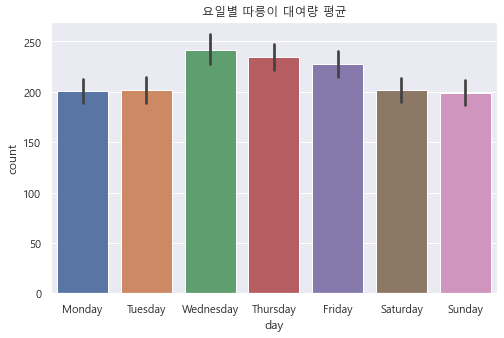

In [347]:
dayname = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(8, 5))
plt.title('요일별 따릉이 대여량 평균')
sns.barplot(x='day', y=target, data=data, order=dayname)
plt.show()

In [362]:
# 변수가 3개 이상이므로 ANOVA 진행
mon = data.loc[data[feature] == 'Monday', target]
tue = data.loc[data[feature] == 'Tuesday', target]
wed = data.loc[data[feature] == 'Wednesday', target]
thu = data.loc[data[feature] == 'Thursday', target]
fri = data.loc[data[feature] == 'Friday', target]
sat = data.loc[data[feature] == 'Saturday', target]
sun = data.loc[data[feature] == 'Sunday', target]

spst.f_oneway(mon, tue, wed, thu, fri, sat, sun)

F_onewayResult(statistic=8.317297883731852, pvalue=5.378942897976812e-09)

#### 9. 풍속

In [376]:
feature = 'windspeed'

<AxesSubplot:xlabel='windspeed', ylabel='count'>

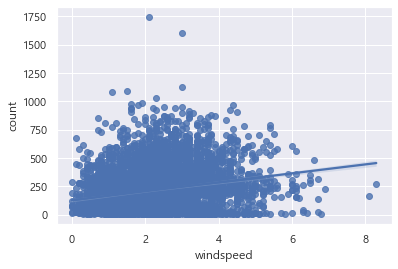

In [377]:
sns.regplot(x=feature, y=target, data=data)

In [378]:
spst.pearsonr(data[feature], data[target])

(0.22372189900674888, 5.2433176782994606e-67)

#### 10. 오존

In [379]:
feature = 'ozone'

<AxesSubplot:xlabel='ozone', ylabel='count'>

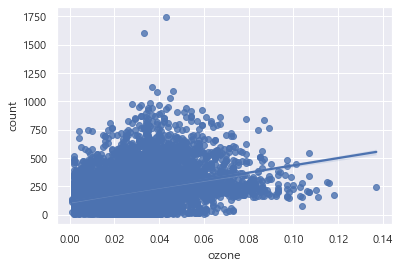

In [380]:
sns.regplot(x=feature, y=target, data=data)

In [381]:
spst.pearsonr(data[feature], data[target])

(0.31515136652439446, 1.6076036486068025e-134)

In [384]:
print('기온이 높을 수록 오존농도도 높다.')
up = summer.loc[summer['diff_temp'] > 0, 'diff_temp'].mean()
down = summer.loc[summer['diff_temp'] < 0, 'diff_temp'].mean()
print(summer.loc[(summer['diff_temp'] > up), 'ozone'].mean())
print(summer.loc[(summer['diff_temp'] < down), 'ozone'].mean())

기온이 높을 수록 오존농도도 높다.
0.044245487364620875
0.03384595300261098


#### 11. 기타(따릉이 대여량이 평균보다 훨씬 많은 대여량을 보이는 이유는 무엇일까?)

In [401]:
month_temp.sort_values(target, ascending=False).head(20) # 평균 오존 : 0.03, 평균 풍속 : 2

,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count,month,meanf,diff_temp
4207,2021-09-02,18,20.0,8.0,0.043,25.4,0,2.1,65,2000,1746,2021-09,25.140000,0.260000
535,2021-04-28,18,49.0,15.0,0.033,17.2,0,3.0,40,2000,1600,2021-04,17.100000,0.100000
505,2021-04-28,17,53.0,15.0,0.037,17.1,0,3.0,42,2000,1126,2021-04,17.890000,-0.790000
4177,2021-09-02,17,15.0,7.0,0.046,25.8,0,1.5,63,2000,1090,2021-09,25.983333,-0.183333
4237,2021-09-02,19,17.0,9.0,0.039,24.9,0,1.1,66,2000,1086,2021-09,24.050000,0.850000
4208,2021-09-03,18,6.0,6.0,0.045,28.0,0,2.3,44,2000,1026,2021-09,25.140000,2.860000
4229,2021-09-24,18,12.0,6.0,0.036,25.4,0,1.9,55,2000,988,2021-09,25.140000,0.260000
565,2021-04-28,19,39.0,14.0,0.028,16.1,0,1.6,37,2000,976,2021-04,15.863333,0.236667
4220,2021-09-15,18,12.0,5.0,0.040,25.9,0,4.4,49,2000,965,2021-09,25.140000,0.760000
4956,2021-10-13,18,15.0,7.0,0.032,22.4,0,1.8,60,2000,963,2021-10,17.412903,4.987097


In [402]:
data.sort_values(target, ascending=False).head(20)

,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count,month,day
3710,2021-09-02,18,20.0,8.0,0.043,25.4,0,2.1,65,2000,1746,2021-09,Thursday
665,2021-04-28,18,49.0,15.0,0.033,17.2,0,3.0,40,2000,1600,2021-04,Wednesday
664,2021-04-28,17,53.0,15.0,0.037,17.1,0,3.0,42,2000,1126,2021-04,Wednesday
3709,2021-09-02,17,15.0,7.0,0.046,25.8,0,1.5,63,2000,1090,2021-09,Thursday
3711,2021-09-02,19,17.0,9.0,0.039,24.9,0,1.1,66,2000,1086,2021-09,Thursday
3734,2021-09-03,18,6.0,6.0,0.045,28.0,0,2.3,44,2000,1026,2021-09,Friday
4236,2021-09-24,18,12.0,6.0,0.036,25.4,0,1.9,55,2000,988,2021-09,Friday
666,2021-04-28,19,39.0,14.0,0.028,16.1,0,1.6,37,2000,976,2021-04,Wednesday
4022,2021-09-15,18,12.0,5.0,0.040,25.9,0,4.4,49,2000,965,2021-09,Wednesday
4692,2021-10-13,18,15.0,7.0,0.032,22.4,0,1.8,60,2000,963,2021-10,Wednesday


### 5. 가설 검정

#### <font color='green'>1. 강한 관계의 변수 (대립가설 채택)</font>

강수여부, 시간대, 온도, 습도, 시정, 요일

#### <font color='green'>2. 약한 관계의 변수</font>


미세먼지, 초미세먼지

#### <font color='green'>3. 관계 없는 변수 (귀무가설 채택)</font>


### 6. Insight 도출

- 강수가 없을수록 따릉이 대여량이 높다.
- 출근시간인 오전 8시, 퇴근시간인 오후 6시에 따릉이 대여량이 높다.
- 겨울의 경우 평균 기온차보다 높은 따듯한 날일 경우 따릉이 대여량이 더 높다.
- 습도가 적정습도일 경우 따릉이 대여량이 더 높다.
- 시정 데이터가 평균보다 높을 경우 따릉이 대여량이 더 높다.
- 수요일에 따릉이 대여량이 가장 많으며 주말보다 평일에 따릉이 대여량이 더 높다.